In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

## DS Look on: Продажа новых квартир в Астане (Нур-Султан) by krisha.kz


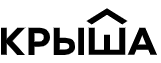

Интро: В данном блокноте будет проведен анализ цен на квартиры в новых ЖК(новостройки) опубликованные на сайте объявлений krisha.kz за 07.09.2020
Данные были собраны, обработаны и проанализированы с сайта krisha.kz , используя Python и его библиотек. Выборка состоит из 167 квартир, опубликованными отделами продаж застройщиков.


В выборке отсутствуют объявления с других сайтов, других застройщиков (Bazis,NAK и тд) так как их не было на Krisha.kz

P.S данная выборка слишком мала, поэтому не следует принимать решения, опираясь только на этот блокнот.
#### P.S.S. Все мнения и доводы, касаются только данную выборку и не описывают текущее положение рынка недвижимости города Нур-Султан

## Обзор:

In [2]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
hide_toggle()

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
hide_toggle()

In [4]:
xls = pd.ExcelFile(r"krysha.xlsx")
hide_toggle()

In [5]:
data= pd.read_excel(xls, 'Sheet1')
hide_toggle()

In [6]:
data["Цена за м2"]=data["Цена (тнг)"]/data["Площадь (м2)"]
hide_toggle()

#### Порядок квартир соответсвует странице объявления. То есть, первые варианты были опубликованны на первых страницах сайта, а последние на последних.

In [7]:
data

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
0,0,«Ботанический»,«BI Group»,117.21,3,\n жил. комплекс Ботаническ...,55487214,4.41,63.63,3.0,473400.000000
1,1,«Vela Village»,«BI Group»,219.83,5,\n жил. комплекс Vella Vill...,86261292,16.92,90.53,3.6,392400.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000
3,3,«Headliner»,«BI Group»,111.94,3,"\n жил. комплекс Headliner,...",42258294,NaN,NaN,3.0,377508.433089
4,4,«College»,«ТОО Фаворит Строй»,60.96,2,"\n жил. комплекс College, 9...",16443000,10.40,32.78,3.0,269734.251969
...,...,...,...,...,...,...,...,...,...,...,...
162,162,«Казанат 2»,«ЖСК Жануя Инвест»,61.00,2,"\n жил. комплекс Казанат 2,...",12200000,NaN,NaN,2.8,200000.000000
163,163,«Казанат 2»,«ЖСК Жануя Инвест»,44.93,1,"\n жил. комплекс Казанат 2,...",8986000,NaN,NaN,2.8,200000.000000
164,164,«ASQAT»,«Asti Group»,56.07,2,"\n жил. комплекс ASQAT, 7 э...",15979950,10.25,27.62,2.7,285000.000000
165,165,«ASQAT»,«Asti Group»,57.53,2,"\n жил. комплекс ASQAT, 7 э...",16396050,9.83,32.14,2.7,285000.000000


In [8]:
data.describe()

,Unnamed: 0,Площадь (м2),Количество комнат,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
count,167.00000,167.000000,167.000000,1.670000e+02,152.000000,152.000000,157.000000,167.000000
mean,83.00000,77.505988,2.215569,2.641228e+07,12.599013,41.309868,2.877070,310820.067431
std,48.35287,35.872727,0.957656,1.882447e+07,4.171492,21.210581,0.145828,103097.947993
min,0.00000,32.220000,1.000000,4.662000e+06,1.900000,9.800000,2.700000,140000.000000
25%,41.50000,47.900000,1.000000,1.111412e+07,9.717500,20.947500,2.700000,250000.000000
50%,83.00000,68.140000,2.000000,1.901286e+07,11.990000,37.140000,3.000000,290000.000000
75%,124.50000,103.495000,3.000000,3.821538e+07,15.112500,58.032500,3.000000,384300.000000
max,166.00000,219.830000,5.000000,9.169000e+07,29.130000,93.750000,3.600000,522223.472488


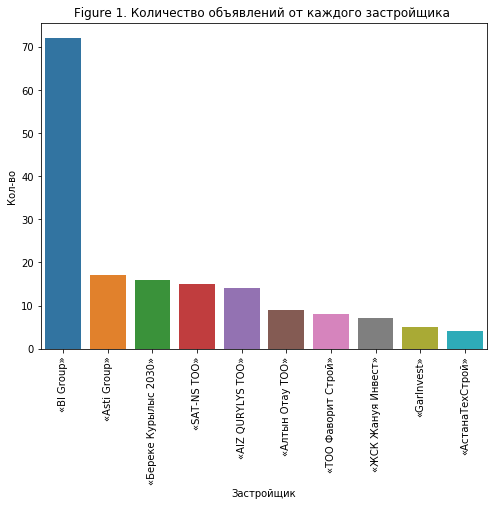

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data["Застройщик"],order = data['Застройщик'].value_counts().index)
ax.set_title('Figure 1. Количество объявлений от каждого застройщика ')
ax.set_ylabel('Кол-во')
plt.xticks(rotation=90)
plt.show()
hide_toggle()

График сверху показывает доминирование объявлений застройщика BI Group, в виду количества ЖК

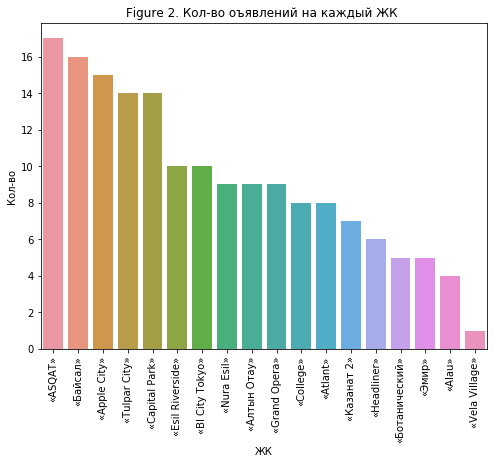

In [23]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=data["ЖК"],order = data['ЖК'].value_counts().index)
ax.set_title('Figure 2. Кол-во оъявлений на каждый ЖК ')
ax.set_ylabel('Кол-во')
plt.xticks(rotation=90)
plt.show()
hide_toggle()

Однако если проанализировать количество объявлений по ЖК  можно заметить, что в ТОПе находятся уже не ЖК BI Group

## Только о цифрах

### Топ 10 низких цен за квадрат 

In [11]:
data.drop_duplicates(subset=['ЖК']).nsmallest(10, 'Цена за м2')


,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
109,109,«Байсал»,«Береке Курылыс 2030»,52.90,2,"\n жил. комплекс Байсал, 6 ...",7406000,14.90,23.60,2.8,140000.000000
13,13,«Tulpar City»,«AIZ QURYLYS ТОО»,39.75,1,\n жил. комплекс Tulpar Cit...,7155000,10.36,18.60,2.7,180000.000000
157,157,«Казанат 2»,«ЖСК Жануя Инвест»,41.87,1,"\n жил. комплекс Казанат 2,...",8374000,NaN,NaN,2.8,200000.000000
15,15,«Алтын Отау»,«Алтын Отау ТОО»,37.02,1,\n жил. комплекс Алтын Отау...,9255000,12.77,15.39,2.8,250000.000000
10,10,«Эмир»,«GarInvest»,60.27,2,"\n жил. комплекс Эмир, 12 э...",15368850,10.24,31.39,3.0,255000.000000
4,4,«College»,«ТОО Фаворит Строй»,60.96,2,"\n жил. комплекс College, 9...",16443000,10.40,32.78,3.0,269734.251969
103,103,«Apple City»,«SAT-NS ТОО»,66.15,2,\n жил. комплекс Apple City...,19183500,15.12,31.34,3.0,290000.000000
134,134,«ASQAT»,«Asti Group»,34.04,1,"\n жил. комплекс ASQAT, 7 э...",10041800,9.74,15.45,2.7,295000.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000
6,6,«Capital Park»,«BI Group»,48.75,2,\n жил. комплекс Capital Pa...,17476875,5.95,27.32,2.7,358500.000000


### Топ 10 высоких цен за квадрат 

In [12]:
data.drop_duplicates(subset=['ЖК']).nlargest(10, 'Цена за м2')

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
8,8,«Esil Riverside»,«BI Group»,127.00,3,\n жил. комплекс Esil River...,63538100,26.19,58.62,3.0,500300.000000
0,0,«Ботанический»,«BI Group»,117.21,3,\n жил. комплекс Ботаническ...,55487214,4.41,63.63,3.0,473400.000000
14,14,«Atlant»,«BI Group»,122.80,3,"\n жил. комплекс Atlant, 21...",53755913,15.22,68.20,3.0,437751.734528
5,5,«Grand Opera»,«BI Group»,132.25,3,\n жил. комплекс Grand Oper...,55994650,18.42,71.13,3.0,423400.000000
7,7,«BI City Tokyo»,«BI Group»,75.41,3,\n жил. комплекс BI City To...,30842690,6.20,44.52,NaN,409000.000000
1,1,«Vela Village»,«BI Group»,219.83,5,\n жил. комплекс Vella Vill...,86261292,16.92,90.53,3.6,392400.000000
148,148,«Nura Esil»,«BI Group»,48.00,1,"\n жил. комплекс Nura Esil,...",18412800,14.22,19.59,3.0,383600.000000
3,3,«Headliner»,«BI Group»,111.94,3,"\n жил. комплекс Headliner,...",42258294,NaN,NaN,3.0,377508.433089
6,6,«Capital Park»,«BI Group»,48.75,2,\n жил. комплекс Capital Pa...,17476875,5.95,27.32,2.7,358500.000000
2,2,«Alau»,«АстанаТехСтрой»,44.22,1,"\n жил. комплекс Alau, 19 э...",15477000,NaN,NaN,3.0,350000.000000


#### Самая дешевая квартира

In [13]:
data[data["Цена (тнг)"]==data["Цена (тнг)"].min()]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
128,128,«Байсал»,«Береке Курылыс 2030»,33.3,1,"\n жил. комплекс Байсал, 6 ...",4662000,10.5,11.1,2.8,140000.0


#### Самая дорогая квартира

In [14]:
data[data["Цена (тнг)"]==data["Цена (тнг)"].max()]

,Unnamed: 0,ЖК,Застройщик,Площадь (м2),Количество комнат,Информация,Цена (тнг),Кухня (м2),Жил площадь (м2),Высота потолков (м),Цена за м2
42,42,«Esil Riverside»,«BI Group»,186.36,4,\n жил. комплекс Esil River...,91690000,19.32,93.75,3.0,492004.722043


## Статистика и визуализация

#### "Чем больше квартира тем дороже " by all people
Мы все знаем этот очевидный факт, это утверждение описывает отношение цены на площадь кв, то есть цену за 1 кв м.
Давайте графически убедимся в этом

### ЦЕНА (тнг) vs ПЛОЩАДЬ (м2)

In [25]:
import plotly.express as px
df = data
fig = px.scatter(df, x="Площадь (м2)", y="Цена (тнг)", color="Застройщик",
                 size='Количество комнат', hover_data=["ЖК","Площадь (м2)","Цена за м2"],title='Figure 3. Цена (тнг) vs Площадь (м2)')
fig.show()
hide_toggle()

#### Наблюдения:
 1. Все затройщики, кроме BI Group имеют примерно одинаковую тендецию отношения цены за площадь, когда у BI Group это цифра заметно больше
 2. Доминирующий затройщик с квартирами выше 125 м2 является BI Group



In [26]:
import plotly.express as px
df1 = data[data['Застройщик']=="«BI Group»"]
fig = px.scatter(df1, x="Площадь (м2)", y="Цена за м2", color="ЖК",
                 size='Количество комнат', hover_data=["ЖК","Площадь (м2)","Цена (тнг)"],title='Figure 4. Цена за м2 vs Площадь (м2)')
fig.show()
hide_toggle()

#### Наблюдения:
 1. Цена за кв м уменьшается при приобритении кв с большей квадратурой при всех остальных равных факторов



# Ящик с усами ( кто не знал русккого названия boxplot)

## Знакомство с ящиком с усами

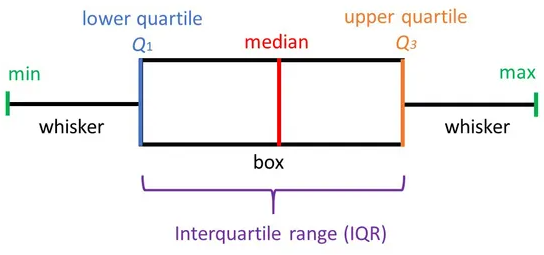

### Ящик с усами, диаграмма размаха (англ. box-and-whiskers diagram or plot, box plot) — график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей.

Нижний(min) и верхний(max) прочерк показывает минимальную и максимальную цену за квартиру,соответственно.
Нижняя(Q1) и верхняя (Q3) граница прямоугольника показывает 25% квартиль и 75% квартиль, соответсвенно.
То есть Верхний квартиль(Q3) это граница значения цены за квартиру при которой 75% квратир имееют цену меньше, а
Нижний квартиль(Q1) это граница значения цены за квартиру при которой 25% квартир имеют значение меньше. 
Если сортировать цены за квартиры по возрастанию и выбрать центральное значение, это будет медианой(median).
Зеленая точка (mean) является значением средней ценой за квартиру.

In [27]:
df.pivot(columns='Застройщик', values='Цена (тнг)').iplot(
        kind='box',
        yTitle='Диапазон цен на квартиры',
        title='Figure 5. Распределение цен на квартиры у застройщика')
hide_toggle()

#### Читаем график:
 1. Медиана цен за квартиру и застройщика "BI Group"  равна 40 млн тенге
 2. 75% квартир застройщика "АстанаТехСтрой" имеют цену меньше 46 млн тенге
 3. 25% квартир застройщика "Asti Group" имеют цену выше 20.6 млн тенге
 4. За 20 млн тенге можно рассмотерть квартиры всех застрощиков, кроме "AIZ QURYLYS TOO","Береке Курылыс 2030" и " ЖСК Жануя Инвест"


In [28]:
df.pivot(columns='Застройщик', values='Цена за м2').iplot(
        kind='box',
        yTitle='Диапазон цен за м2',
        title='Figure 6. Распределение цен за м2 у застройщика')
hide_toggle()

#### Читаем график:
 1. Причина прочерков послужила малая выборка. Застройщики с 1 ЖК обычного класса с единой планировкой будут иметь единую цену за кв м. 



In [29]:
df.pivot(columns='ЖК', values='Цена (тнг)').iplot(
        kind='box',
        yTitle='Диапазон цен на квартиры',
        title='Figure 7. Распределение цен на квартиры в ЖК')
hide_toggle()

#### Читаем график:
 1. ЖК "Алау"  пример нормального распределения ( по графику одинаковые усы и медиана в центре прямоугольника, однако там всего 4 объявления)
 2. 75% квартир застройщика "АстанаТехСтрой" имеют цену меньше 42 млн тенге
 3. 25% квартир застройщика "Asti Group" имеют цену выше 20 млн тенге
 4. За 20 млн тенге можно рассмотерть квартиры всех застрощиков, кроме "AIZ QURYLYS TOO","Береке Курылыс 2030" и " ЖСК Жануя Инвест"


In [30]:
df.pivot(columns='ЖК', values='Цена за м2').iplot(
        kind='box',
        yTitle='Диапазон цен за м2 на квартиры',
        title='Figure 8. Распределение цен за м2 в ЖК')
hide_toggle()

#### Читаем график:
 1. Цена за кв м варируются в ЖК, классом выше.Причиной этому могут быть планировка(угловая/неугловая, этаж, вид с окон, ликвидность 2 квартир и тд.)


### Вывод:
 1. Стоит отметить, что все ЖК застройщика BI Group являются классом выше, по сравнению с другими застройщиками. В добавок: качество, сервис и репутация делают свое дело.(Figure 3, Figure 7)
 2. ТОО застройщики имеют одинаковый прирост цены за м2. (Figure 3)
 3. Квартира с большей квадратурой может быть дороже по цене, но меньше по цене за 1 м2 (Figure 4)
 4. Самые дешевые квартиры среди выборки оказались кв ЖК "Байсал" застройщика "Береке Курылыс 2020" (From table)

